Saving weather.csv to weather (11).csv


,Area Code,Area,Months Code,Months,Element Code,Element,Unit,Y1961,Y1962,Y1963,...,Y2010,Y2011,Y2012,Y2013,Y2014,Y2015,Y2016,Y2017,Y2018,Y2019
0,2,Afghanistan,7001,January,7271,Temperature change,°C,0.777,0.062,2.744,...,3.601,1.179,-0.583,1.233,1.755,1.943,3.416,1.201,1.996,2.951
1,2,Afghanistan,7001,January,6078,Standard Deviation,°C,1.950,1.950,1.950,...,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950
2,2,Afghanistan,7002,February,7271,Temperature change,°C,-1.743,2.465,3.919,...,1.212,0.321,-3.201,1.494,-3.187,2.699,2.251,-0.323,2.705,0.086
3,2,Afghanistan,7002,February,6078,Standard Deviation,°C,2.597,2.597,2.597,...,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597
4,2,Afghanistan,7003,March,7271,Temperature change,°C,0.516,1.336,0.403,...,3.390,0.748,-0.527,2.246,-0.076,-0.497,2.296,0.834,4.418,0.234


         Area Code  Months Code  Element Code        Y1961        Y1962  \
count  9656.000000  9656.000000    9656.00000  8287.000000  8322.000000   
mean    821.806338  7009.882353    6674.50000     0.402433     0.315527   
std    1781.072213     6.038255     596.53089     0.701567     0.713777   
min       1.000000  7001.000000    6078.00000    -4.018000    -5.391000   
25%      78.000000  7005.000000    6078.00000     0.057000    -0.033000   
50%     153.500000  7009.000000    6674.50000     0.366000     0.333000   
75%     226.250000  7016.000000    7271.00000     0.676500     0.627000   
max    5873.000000  7020.000000    7271.00000     5.771000     4.373000   

             Y1963        Y1964        Y1965        Y1966        Y1967  ...  \
count  8294.000000  8252.000000  8281.000000  8364.000000  8347.000000  ...   
mean      0.317393     0.269382     0.217839     0.376419     0.263239  ...   
std       0.853133     0.749216     0.739418     0.737370     0.725421  ...   
min     

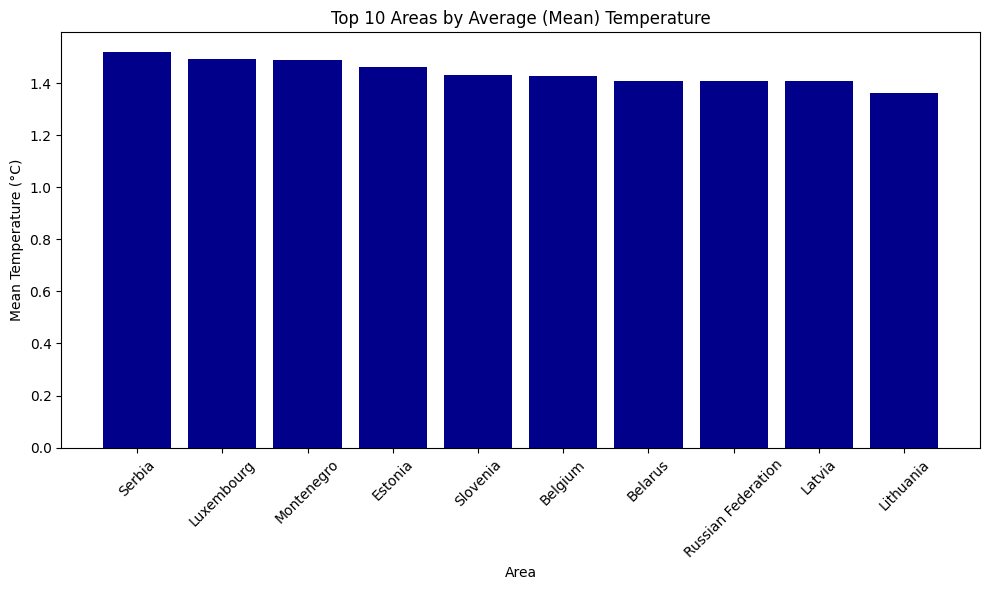

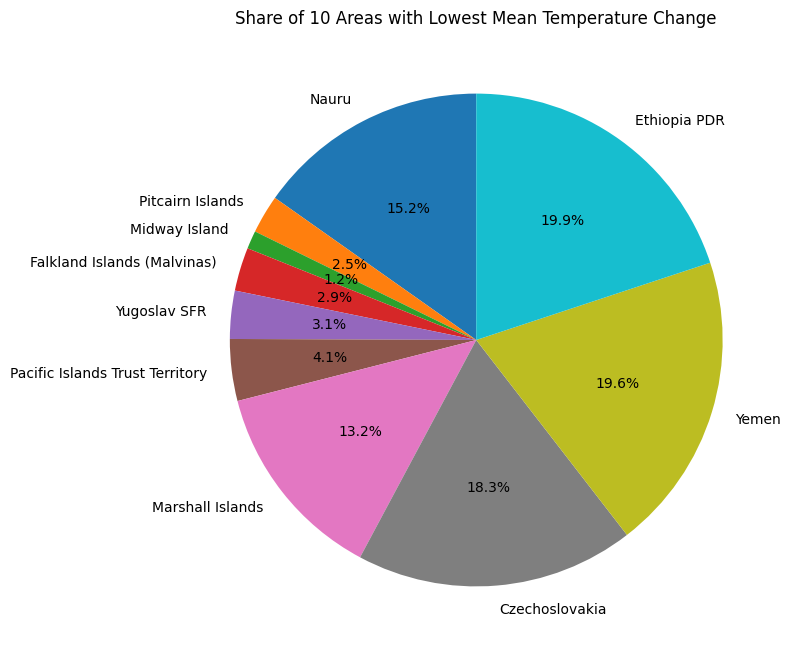

In [ ]:
from google.colab import files
uploaded = files.upload()
import pandas as pd
import matplotlib.pyplot as plt

# Try reading the CSV with a different encoding
try:
    weather = pd.read_csv("weather.csv", encoding='latin-1')
except UnicodeDecodeError:
    weather = pd.read_csv("weather.csv", encoding='ISO-8859-1')

display(weather.head())
print(weather.describe())
print("shape of the data set :",weather.shape)


# Filter only temperature data
temp_weather = weather[weather['Element'] == 'Temperature change']

# Select only year columns (those starting with 'Y')
year_cols = [col for col in weather.columns if col.startswith('Y')]

# Convert from wide to long format
melted = temp_weather.melt(
    id_vars=['Area', 'Months'],
    value_vars=year_cols,
    var_name='Year',
    value_name='Temperature'
)

# Calculate area-wise max and min temperature
area_temp_stats = melted.groupby('Area')['Temperature'].agg(['max', 'min']).reset_index()
print("Area with Maximum and Minimum Temperature")
print(area_temp_stats)

# Convert to numeric (in case of missing or text data)
melted['Temperature'] = pd.to_numeric(melted['Temperature'], errors='coerce')

# Drop missing values
melted.dropna(subset=['Temperature'], inplace=True)

# Define a function to safely compute mode
def safe_mode(series):
    m = series.mode()
    return m.iloc[0] if not m.empty else None

# Group by Area and calculate stats
area_report = melted.groupby('Area')['Temperature'].agg(
    Mean='mean',
    Median='median',
    Mode=safe_mode
).reset_index()

print(area_report)

# Sort by Mean and pick top 10
top10 = area_report.sort_values('Mean', ascending=False).head(10)

plt.figure(figsize=(10,6))
plt.bar(top10['Area'], top10['Mean'], color='darkblue')
plt.title('Top 10 Areas by Average (Mean) Temperature')
plt.xlabel('Area')
plt.ylabel('Mean Temperature (°C)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Sort by Mean in ascending order and select bottom 10
bottom10 = area_report.sort_values('Mean', ascending=True).head(10)

# Take absolute values for pie chart (since pie slices can't be negative)
plt.figure(figsize=(8,8))
plt.pie(bottom10['Mean'].abs(), labels=bottom10['Area'], autopct='%1.1f%%', startangle=90)
plt.title('Share of 10 Areas with Lowest Mean Temperature Change')
plt.show()



